In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
from google.colab.patches import cv2_imshow as sh

In [ ]:
img = cv2.imread('/content/drive/MyDrive/BTP/Results- Part-1/dataset/images/image1.png', 0)
lab = cv2.imread('/content/drive/MyDrive/BTP/Results- Part-1/dataset/mask-duplicate/label1.png', 0)

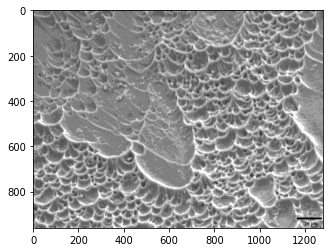

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

In [ ]:
opening = (np.logical_not(opening)).astype(np.uint8)

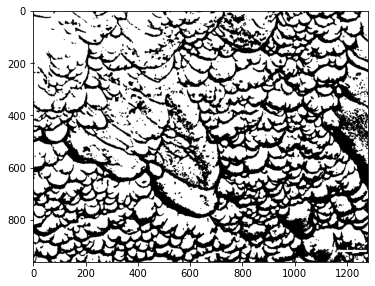

In [ ]:
plt.figure(figsize=(6, 8))
plt.imshow(opening, cmap='gray')

In [ ]:
sure_bg = cv2.dilate(opening, kernel, iterations=2)

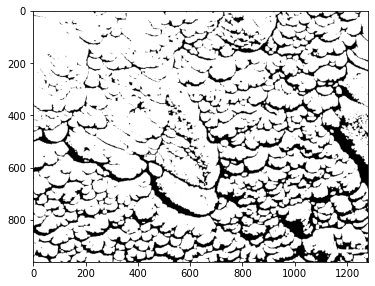

In [ ]:
plt.figure(figsize=(6, 8))
plt.imshow(sure_bg, cmap='gray')

In [ ]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)

<Figure size 432x576 with 0 Axes>

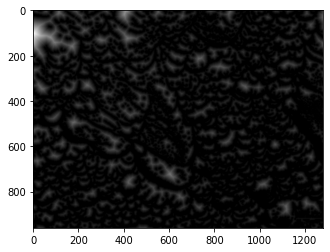

<Figure size 432x576 with 0 Axes>

In [ ]:
plt.imshow(dist_transform, cmap='gray')
plt.figure(figsize=(6, 8))

In [ ]:
## THE PARAMETER VALUE (0.3) IS THE ONE THAT CHANGES PREDICTION
## IF YOU FEEL LARGE AREAS OF THE IMAGE ARE NOT DETECTED THEN DECREASE THE VALUE SLIGHTLY.
## IF YOU FEEL DIMPLES ARE NOT SEGMENTED PROPERLY THEN SLIGHTLY INCREASE IT.
## CHOOSE A VALUE SUCH THAT OUR IMAGES ARE PROPERLY SEGMENTED WITH ACCEPTABLE COVERAGE OF DIMPLES.
ret2, sure_fg = cv2.threshold(dist_transform, 0.3*dist_transform.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)

<Figure size 432x576 with 0 Axes>

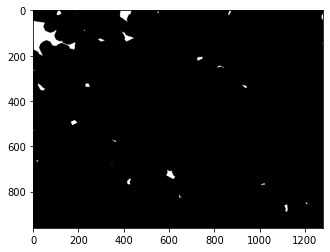

<Figure size 432x576 with 0 Axes>

In [ ]:
plt.imshow(sure_fg, cmap='gray')
plt.figure(figsize=(6, 8))

In [ ]:
unknown = cv2.subtract(sure_bg, sure_fg)

<Figure size 432x576 with 0 Axes>

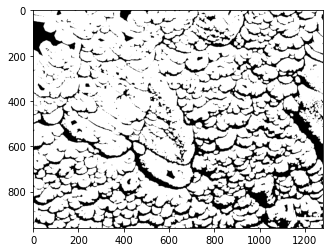

<Figure size 432x576 with 0 Axes>

In [ ]:
plt.imshow(unknown, cmap='gray')
plt.figure(figsize=(6, 8))

In [ ]:
ret3, markers = cv2.connectedComponents(sure_fg)
markers = markers+10
markers = np.uint8(markers)
markers[unknown==1] = 0

In [ ]:
np.unique(markers)

array([ 0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42],
      dtype=uint8)

<Figure size 432x576 with 0 Axes>

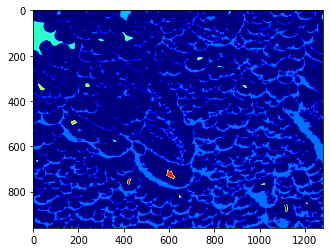

<Figure size 432x576 with 0 Axes>

In [ ]:
plt.imshow(markers, cmap='jet')
plt.figure(figsize=(6, 8))

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(img, np.int32(markers))
img2 = color.label2rgb(markers, bg_label=10)

<Figure size 432x576 with 0 Axes>

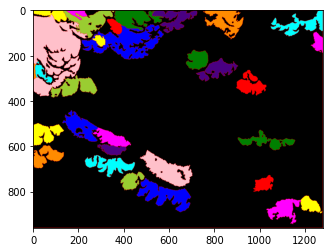

<Figure size 432x576 with 0 Axes>

In [ ]:
plt.imshow(img2)
plt.figure(figsize=(6, 8))

In [ ]:
skeleton_img = np.zeros(img.shape, dtype=np.uint8)
skeleton_img[markers == -1] = [255, 255, 255]

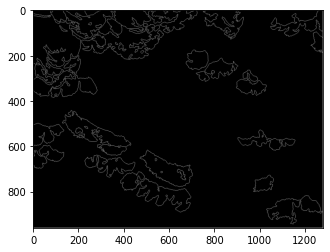

<Figure size 432x576 with 0 Axes>

In [ ]:
plt.imshow(skeleton_img)
plt.figure(figsize=(6, 8))
plt.show()

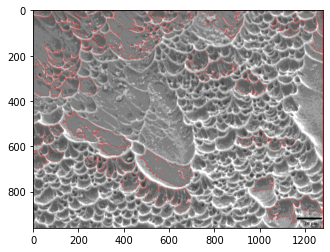

<Figure size 432x576 with 0 Axes>

In [ ]:
img[markers == -1] = [255, 0, 0]
plt.imshow(img)
plt.figure(figsize=(6, 8))
plt.show()

In [ ]:
regions = measure.regionprops(markers, intensity_image=img)

In [ ]:
props = measure.regionprops_table(markers, intensity_image=img, properties=['area', 'equivalent_diameter', 'mean_intensity', 'orientation', 'perimeter', 'max_intensity' ,'min_intensity', 'major_axis_length', 'minor_axis_length'])

import pandas as pd
df = pd.DataFrame(props)
print(df)

      area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
0   934316          1090.691560        149.044665        149.044665   
1     4034            71.667624        114.109073        114.109073   
2     1802            47.899662        107.469478        107.469478   
3    10783           117.172275        124.140221        124.140221   
4     8614           104.726718        115.947992        115.947992   
5    10337           114.723481        126.630937        126.630937   
6     9256           108.559225        113.070441        113.070441   
7    39428           224.056441        118.536674        118.536674   
8    10972           118.194688        116.733503        116.733503   
9     2617            57.724067        127.269392        127.269392   
10   23772           173.975431        124.174828        124.174828   
11    1703            46.565298        100.876101        100.876101   
12    2819            59.910452        128.679674        128.679674   
13    

In [ ]:
# import pandas as pd
# from skimage.segmentation import clear_border
# propslist = ['Area', 'equivalent_diameter', 
#              'Orientation', 'MajorAxisLength',
#              'MinorAxisLength', 'Perimeter',
#              'MinIntensity', 'MaxIntensity',
#              'MeanIntensity']

# dimple_number=0
# for region in regions:
#   # for i, prop in enumerate(propslist):
#   edge_touching_removed = clear_border(region)
#   label_image = measure.label(edge_touching_removed, connectivity=img.ndim)
#   props = measure.regionprops_table(region, skeleton_img, properties=['label', 'area', 'equivalent_diameter', 'mean_intensity', 'solidity'])
#   df = pd.DataFrame(props)
# print(df);

In [ ]:
df.to_excel('/content/drive/MyDrive/BTP/Result- Part-2/Dimples_Statistics/image1.xls', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
